# Droit à l'image

Les images utilisées sont des **images publiques issues du Web**, il s'agit précisément du **jeu de données "Stanford Dogs Dataset"**, montrant 20 580 images de 120 espèces de chiens.  
Ces images et leurs annotations sont **elles-mêmes issues du jeu de données ImageNet**, connu pour sa qualité contrôlée et les annotations humaines.

Les conditions d'accès à l'intégralité d'ImageNet sont rappelées ici : (https://www.image-net.org/download)[https://www.image-net.org/download]

Le droit à l'image est respecté, ces jeux de données étant publics, d'autant plus dans cet usage non-commercial et éducatif.

# Mise en place

In [1]:
# OS & env
from dotenv import load_dotenv
import os
import yaml

# DS
import numpy as np
import pandas as pd

# dataviz
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# home made functions from the src folder
from src.get_data import get_tar_and_extract
from src.get_data import create_img_db

Configuration

In [2]:
# environment config
load_dotenv()
IMG_URL = os.getenv("IMG_URL")
ANNOT_URL = os.getenv("ANNOT_URL")

# local config
with open('config.yaml', 'r') as f:
    cfg = yaml.safe_load(f)

data_dir = cfg["data"]["local_path"]
img_dir = os.path.join(data_dir, cfg["data"]["img_dir"])
annot_dir = os.path.join(data_dir, cfg["data"]["annot_dir"])
img_db_uri = os.path.join(data_dir, cfg["data"]["img_db_uri"])

Images et annotations, création de la BDD

In [3]:
if os.path.exists(img_db_uri):
    img_df = pd.read_csv(img_db_uri, index_col=0)
else:
    # download, extract and store data
    print("⚙️ Downloading images...")
    get_tar_and_extract(IMG_URL, data_dir)
    print("⚙️ Downloading annotations...")
    get_tar_and_extract(ANNOT_URL, data_dir)
    print("⚙️ Creating database...")
    
    # create database
    img_df = create_img_db(img_dir, annot_dir, img_db_uri)

⚙️ Downloading images...
⚙️ Downloading annotations...
⚙️ Creating database...


# EDA

In [4]:
img_df

,ID,class_label,width,height,depth,bb_xmin,bb_ymin,bb_xmax,bb_ymax,img_uri
0,n02104365_2978,schipperke,350,350,3,97,130,278,291,data/Images/n02104365-schipperke/n02104365_297...
1,n02104365_7859,schipperke,333,500,3,2,3,331,498,data/Images/n02104365-schipperke/n02104365_785...
2,n02104365_7301,schipperke,333,500,3,82,56,291,440,data/Images/n02104365-schipperke/n02104365_730...
3,n02104365_10399,schipperke,375,500,3,15,67,251,381,data/Images/n02104365-schipperke/n02104365_103...
4,n02104365_2940,schipperke,500,375,3,32,59,456,333,data/Images/n02104365-schipperke/n02104365_294...
...,...,...,...,...,...,...,...,...,...,...
20575,n02100877_838,Irish_setter,500,432,3,79,93,423,343,data/Images/n02100877-Irish_setter/n02100877_8...
20576,n02100877_2298,Irish_setter,500,332,3,174,113,310,271,data/Images/n02100877-Irish_setter/n02100877_2...
20577,n02100877_6998,Irish_setter,500,333,3,149,87,499,332,data/Images/n02100877-Irish_setter/n02100877_6...
20578,n02100877_863,Irish_setter,375,500,3,18,43,373,495,data/Images/n02100877-Irish_setter/n02100877_8...


In [5]:
img_df.describe(include="all")

,ID,class_label,width,height,depth,bb_xmin,bb_ymin,bb_xmax,bb_ymax,img_uri
count,20580,20580,20580.000000,20580.000000,20580.0,20580.000000,20580.000000,20580.000000,20580.000000,20580
unique,20580,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20580
top,n02100877_6926,Maltese_dog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,data/Images/n02100877-Irish_setter/n02100877_6...
freq,1,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,NaN,NaN,442.531876,385.861224,3.0,76.541011,56.541351,365.581681,354.171283,NaN
std,NaN,NaN,142.792308,124.863446,0.0,75.279383,59.406210,129.140475,122.409322,NaN
min,NaN,NaN,97.000000,100.000000,3.0,0.000000,0.000000,71.000000,90.000000,NaN
25%,NaN,NaN,361.000000,333.000000,3.0,15.000000,13.000000,291.000000,289.000000,NaN
50%,NaN,NaN,500.000000,375.000000,3.0,57.000000,39.000000,359.000000,339.000000,NaN
75%,NaN,NaN,500.000000,453.000000,3.0,120.000000,82.000000,439.000000,399.000000,NaN


Informations pertinentes :
- **20580 images**
- **120 races** de chien différentes
- **taille** moyenne : **442 x 385**
- tailles **très différentes** (étalées)
- toutes les images sont en **couleur**

Nombre d'images par race de chien

Text(0.5, 1.0, 'Number of images per breed\n(min 148, median 159.5, mean 171.5, max 252)')

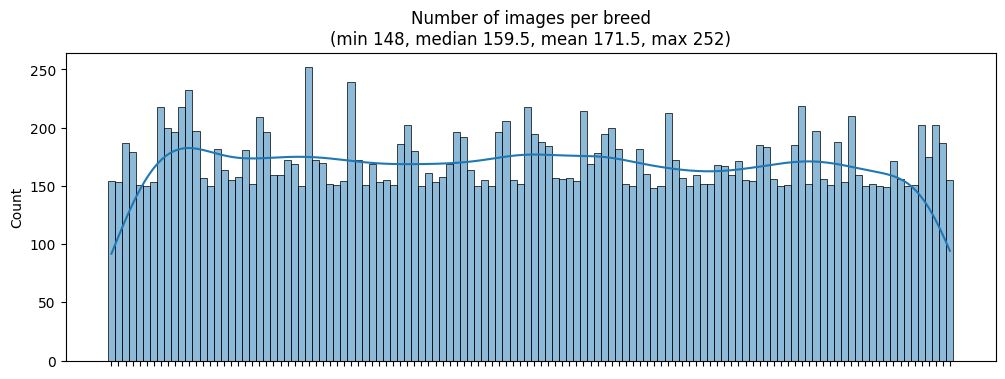

In [42]:
breeds = img_df["class_label"].value_counts().index
n_per_breed = img_df["class_label"].value_counts().values

plt.figure(figsize=(12,4))
ax = sns.histplot(data=img_df, x="class_label", kde=True)
ax.set(xticklabels=[])
ax.set(xlabel=None)
plt.title(f"Number of images per breed\n(min {n_per_breed.min()}, median {np.median(n_per_breed)}, mean {n_per_breed.mean()}, max {n_per_breed.max()})")

Les classes sont relativement équilibrées mais nombreuses et cela fait **peu d'images par classe**.

L'acquisition de nouvelles images étant onéreuse, il est donc nécessaire de procéder à une augmentation des données (***data augmentation***).

# 🚧 Traitements des images

- redimensionnement
- whitening
- passage en gris
- filtrage du bruit
- égalisation
- floutage

data augmentation:
- mirroring
- cropping
- rotation

# Traitement du contraste

librairies spécialisées pour un premier traitement du contraste (ex. : openCV)

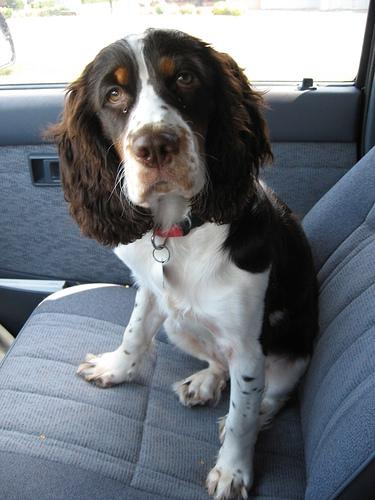

In [6]:

# Charger l'image comme matrice de pixels
img = Image.open(img_df["img_uri"][4242])
img_arr = np.array(img)

display(img)

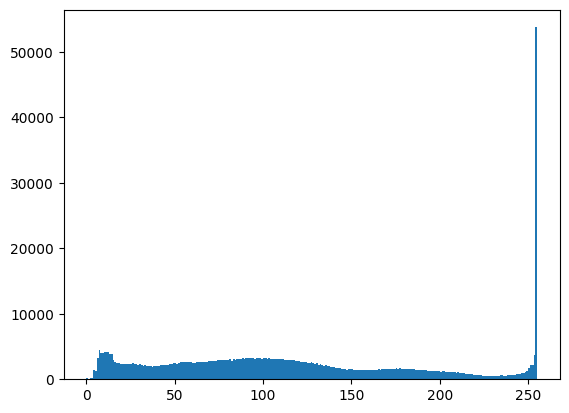

In [7]:
# Générer et afficher l'histogramme
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True
n, bins, patches = plt.hist(img_arr.flatten(), bins=range(256))
plt.show()